<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Making Better Predictions

# What could go wrong?

What is the goal of machine learning? What makes a **good** model?

The ability to **generalise**.

![](assets/images/bias_vs_variance.png)

## Bias

- high bias means your model is **systematically** off with its predictions

- high bias typically means bad model assumptions

- e.g. fitting a linear model for nonlinear data!

## Assumptions of linear models

- linearity

- independence of samples from one another (not true in a time series!)

- data is normally distributed

- linearity
- independence of samples from one another (not true in a time series!)
- data is normally distributed
- homoscedasticity (variance is equal throughout)

![](assets/images/homoscedasticity.jpg)

image from [http://www.statisticssolutions.com/assumptions-of-linear-regression/](http://www.statisticssolutions.com/assumptions-of-linear-regression)

## Variance

- high variance means your model is **erratic** and is too sensitive to changes in your data

- high variance typically means your model is **too complex**

## Bias vs. Variance

- bias and variance are sort of opposites

- high bias models are not complex enough, high variance models are too complex

- as you decrease bias... variance increases - so it's a tradeoff!

## Underfitting vs. Overfitting

- if your model has high bias, it is **underfitting** i.e. "not learning enough about your data"

- if your model has high variance, it is **overfitting** i.e. "learning too much about your data"

- both are bad!

## Finding the sweet spot

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

%matplotlib inline

mammals = pd.read_table("assets/data/mammals.txt", sep='\t', names=['brain','body'], header=0)
mammals = mammals[mammals["body"] < 300]

In [2]:
mammals.head()

,brain,body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
4,36.330,119.5
5,27.660,115.0


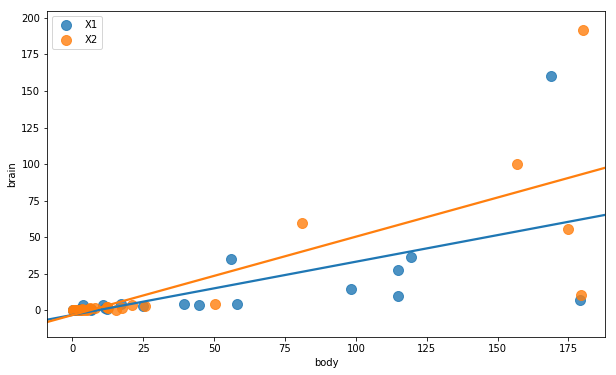

In [3]:
X = mammals["body"]
y = mammals["brain"]

X_1, X_2, y_1, y_2 = train_test_split(X, y, test_size=0.5, random_state=7)

fig, ax = plt.subplots(figsize=(10, 6))

sns.regplot(X_1, y_1, ax=ax, ci=None, label="X1", scatter_kws={"s": 100})
sns.regplot(X_2, y_2, ax=ax, ci=None, label="X2", scatter_kws={"s": 100})
ax.legend(loc="best")

plt.show()

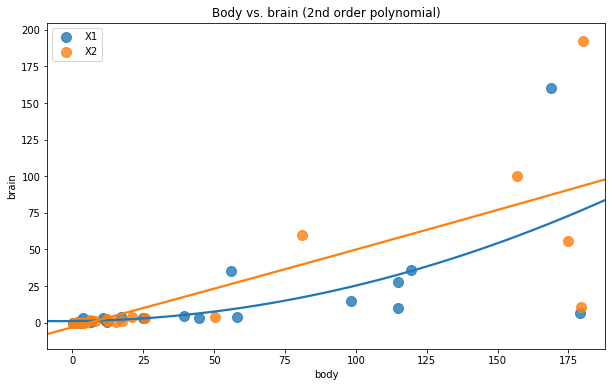

In [4]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.regplot(X_1, y_1, order=2, ax=ax, ci=None, label="X1", scatter_kws={"s": 100})
sns.regplot(X_2, y_2, order=2, ax=ax, ci=None, label="X2", scatter_kws={"s": 100})
ax.legend(loc="best")

ax.set_title("Body vs. brain (2nd order polynomial)")

plt.show()

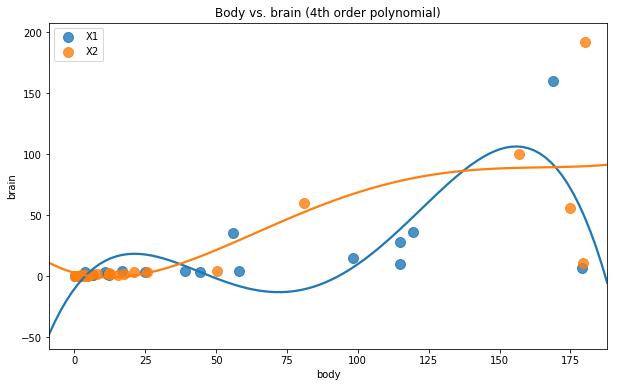

In [5]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.regplot(X_1, y_1, order=4, ax=ax, ci=None, label="X1", scatter_kws={"s": 100})
sns.regplot(X_2, y_2, order=4, ax=ax, ci=None, label="X2", scatter_kws={"s": 100})
ax.legend(loc="best")

ax.set_title("Body vs. brain (4th order polynomial)")

plt.show()

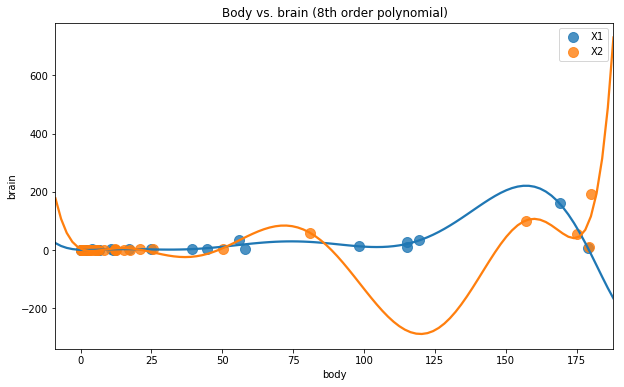

In [6]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.regplot(X_1, y_1, order=8, ax=ax, ci=None, label="X1", scatter_kws={"s": 100})
sns.regplot(X_2, y_2, order=8, ax=ax, ci=None, label="X2", scatter_kws={"s": 100})
ax.legend(loc="best")

ax.set_title("Body vs. brain (8th order polynomial)")

plt.show()

![](assets/images/train_test_error.png)

image from [http://machinelearning2010fall.pbworks.com/f/LowBiasHighVarianceFigure2-11ESL.bmp](http://machinelearning2010fall.pbworks.com/f/LowBiasHighVarianceFigure2-11ESL.bmp)

# What can we do about it?

#### Collect more data

#### Add more features

- works for low bias models, dangerous for high variance models!

#### Take away features

- high variance models may be overfitting due to complexity
- sometimes, simpler is better!

# Cross-validation

- Idea: instead of doing **one** train-test split, let's do **several**

- we'll call that number $k$

- split our data into $k$ "folds", and do a train-test split $k$ times

![](assets/images/cross_validation.jpg)

If you have lots of data, ideally you will:

- start with a single train-test split, and put the test set aside

- do k-fold cross-validation on the **training** set

- so there will be $k$ number of mini train-test splits

### Benefits of this approach

- can be used to "tune" so-called "hyperparameters" e.g. what order polynomial to use

- if your model performs very different in each fold, you have a variance problem

- averaging model performance across these folds give you a better estimate of its ability to generalise

- it's also better to compare two algorithms using this approach

<a id="leave-one-out-cross-validation"></a>
### Leave-One-Out Cross-Validation

A special case of k-fold cross-validation is leave-one-out cross-validation. Rather than taking 5–10 folds, we take a fold of size `n-1` and leave one observation to test. 

Typically, 5–10 fold cross-validaiton is recommended.

### Cross-validation in action

#### Create train-test split and initialise K-folds

In [7]:
from sklearn.model_selection import KFold, train_test_split

X = mammals[["body"]]
y = mammals["brain"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

four_fold_cv = KFold(n_splits=4, shuffle=True, random_state=42)

In [8]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

i = 1
scores = []

for train_index, test_index in four_fold_cv.split(X_train, y_train):
    print(f"Fold {i}", end="\t")
    i += 1
    
    X_train_local = X_train.iloc[train_index]
    y_train_local = y_train.iloc[train_index]
    
    model = LinearRegression()
    model.fit(X_train_local, y_train_local)
    y_pred = model.predict(X_train.iloc[test_index])
    rmse = np.sqrt(mean_squared_error(y_train.iloc[test_index], y_pred))
    print(f"\tRMSE: {rmse}")
    scores.append(rmse)
print("Mean RMSE:\t{0:.1f}".format(np.mean(scores)))

Fold 1		RMSE: 49.50956384673917
Fold 2		RMSE: 26.869799079558984
Fold 3		RMSE: 36.39363994713147
Fold 4		RMSE: 18.106981498328953
Mean RMSE:	32.7


#### Or the short way

In [9]:
from sklearn.model_selection import train_test_split, cross_val_score

model = LinearRegression()

cv_scores = cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv=4)

print(cv_scores)

[-2663.46182681  -840.90099289  -577.8339551    -61.06174559]


#### Convert to actual RMSE scores

In [10]:
rmse_scores = np.sqrt(-cv_scores)
print(rmse_scores)
print("Mean RMSE: {0:.1f}".format(np.mean(rmse_scores)))

[51.60873789 28.99829293 24.03817703  7.81420153]
Mean RMSE: 28.1
